# Mini-Project - Principal Component Analysis

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Mini-Project: Principal Component Analysis
Course: Data Science - Foundations II  
COD: ND111  
Date: 23/01/2019    

***

## Table of Contents
- [Introduction](#intro)
- [Given code 1](#code1)
- [Exercise 1](#part_i_1)
- [Exercise 2](#part_i_2)
- [Exercise 3](#part_i_3)
- [Exercise 4](#part_i_4)
- [Exercise 5](#part_i_5)
***

In [1]:
# Importing Libraries.
import numpy as np
import pandas as pd

## General Information

This Jupyter Notebook (in Python 2) aims to create a reproducible archive.

## Introduction <a id='intro'></a>

Our discussion of PCA spent a lot of time on theoretical issues, so in this mini-project we’ll ask you to play around with some sklearn code. The eigenfaces code is interesting and rich enough to serve as the testbed for this entire mini-project.

The starter code can be found in pca/eigenfaces.py. This was mostly taken from the example found [here][scikit_learn_face_rec], on the sklearn documentation.

Take note when running the code, that there are changes in one of the parameters for the SVC function called on line 94 of pca/eigenfaces.py. For the 'class_weight' parameter, the argument string "auto" is a valid value for sklearn version 0.16 and prior, but will be depreciated by 0.19. If you are running sklearn version 0.17 or later, the expected argument string should be "balanced". If you get an error or warning when running pca/eigenfaces.py, make sure that you have the correct argument on line 98 that matches your installed version of sklearn.

[scikit_learn_face_rec]: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

## Exercise 1 - Explained Variance of Each PC <a id='part_i_1'></a>

We mentioned that PCA will order the principal components, with the first PC giving the direction of maximal variance, second PC has second-largest variance, and so on.

We found that sometimes the pillow module (which is being used in this example) can cause trouble. If you get an error related to the fetch_lfw_people() command, try the following:

pip install --upgrade PILLOW

If you run into a different error, note that there are changes in one of the parameters for the SVC function called on line 94 of pca/eigenfaces.py. For the 'class_weight' parameter, the argument string "auto" is a valid value for sklearn version 0.16 and prior, but will be depreciated by 0.19. If you are running sklearn version 0.17 or later, the expected argument string should be "balanced". If you get an error or warning when running pca/eigenfaces.py, make sure that you have the correct argument on line 98 that matches your installed version of sklearn.

In [2]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

"""

print __doc__

from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print "Total dataset size:"
print "n_samples: %d" % n_samples
print "n_features: %d" % n_features
print "n_classes: %d" % n_classes


Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Extracting the top 150 eigenfaces from 966 faces
done in 0.364s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.026s
Fitting the classifier to the training set


C:\Python27\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


done in 23.557s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.051s
                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.69      0.62        13
     Colin Powell       0.74      0.87      0.80        60
  Donald Rumsfeld       0.75      0.78      0.76        27
    George W Bush       0.92      0.86      0.89       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.88      0.83      0.86        36

        micro avg       0.83      0.83      0.83       322
        macro avg       0.77      0.77      0.77       322
     weighted avg       0.83      0.83      0.83       322



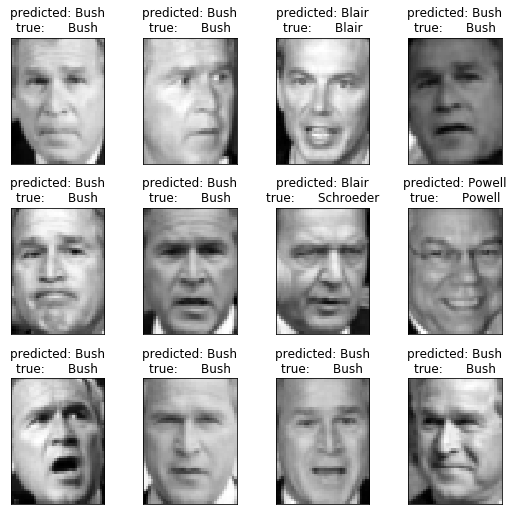

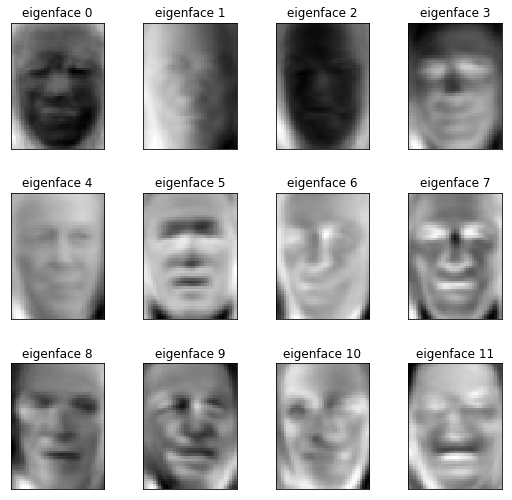

In [3]:
###############################################################################
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
t0 = time()
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape((n_components, h, w))

print "Projecting the input data on the eigenfaces orthonormal basis"
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print "done in %0.3fs" % (time() - t0)


###############################################################################
# Train a SVM classification model

print "Fitting the classifier to the training set"
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_


###############################################################################
# Quantitative evaluation of the model quality on the test set

print "Predicting the people names on the testing set"
t0 = time()
y_pred = clf.predict(X_test_pca)
print "done in %0.3fs" % (time() - t0)

print classification_report(y_test, y_pred, target_names=target_names)
print confusion_matrix(y_test, y_pred, labels=range(n_classes))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()

In [23]:
# First and second Principal Components.
pca.explained_variance_ratio_[0:2].tolist()

[0.19334688782691956, 0.15120740234851837]

>**How much of the variance is explained by the first principal component? The second?**

* First: 0.19334688782691956
* Second: 0.15120740234851837

## Exercise 2 - How Many PCs to Use? <a id='part_i_2'></a>

Now you'll experiment with keeping different numbers of principal components. In a multiclass classification problem like this one (more than 2 labels to apply), accuracy is a less-intuitive metric than in the 2-class case. Instead, a popular metric is the F1 score.

We’ll learn about the F1 score properly in the lesson on evaluation metrics, but you’ll figure out for yourself whether a good classifier is characterized by a high or low F1 score. You’ll do this by varying the number of principal components and watching how the F1 score changes in response.

In [42]:
from sklearn.metrics import accuracy_score

In [46]:
###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
def PCA_wrapper(n_components = 150):
    print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    t0 = time()
    pca = PCA(n_components=n_components, whiten=True).fit(X_train)
    print "done in %0.3fs" % (time() - t0)

    eigenfaces = pca.components_.reshape((n_components, h, w))

    print "Projecting the input data on the eigenfaces orthonormal basis"
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print "done in %0.3fs" % (time() - t0)
    
    print "Fitting the classifier to the training set"
    t0 = time()
    param_grid = {
             'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              }
    # for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_pca, y_train)
    print "done in %0.3fs" % (time() - t0)
    print "Best estimator found by grid search:"
    print clf.best_estimator_
    
    ###############################################################################
    # Quantitative evaluation of the model quality on the test set

    print "Predicting the people names on the testing set"
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print "done in %0.3fs" % (time() - t0)

    print classification_report(y_test, y_pred, target_names=target_names)
    print confusion_matrix(y_test, y_pred, labels=range(n_classes))
    
    return y_pred 

In [44]:
y_pred_200 = PCA_wrapper(200);
y_pred_100 = PCA_wrapper(100);
y_pred_50 = PCA_wrapper(50);
y_pred_25 = PCA_wrapper(25);

done in 0.381s
done in 0.015s
done in 0.206s
done in 0.016s
done in 0.129s
done in 0.016s
done in 0.141s
done in 0.014s


In [45]:
acc_200 = accuracy_score(y_test, y_pred_200)
acc_150 = accuracy_score(y_test, y_pred)
acc_100 = accuracy_score(y_test, y_pred_100)
acc_50 = accuracy_score(y_test, y_pred_50)
acc_25 = accuracy_score(y_test, y_pred_25)


acc_25, acc_50, acc_100, acc_150, acc_200

(0.7422360248447205,
 0.8229813664596274,
 0.8540372670807453,
 0.8260869565217391,
 0.84472049689441)

>**As you add more principal components as features for training your classifier, do you expect it to get better or worse performance?**

Better

## Exercise 3 - F1 Score vs. No. of PCs Used <a id='part_i_3'></a>

Change n_components to the following values: [10, 15, 25, 50, 100, 250]. For each number of principal components, note the F1 score for Ariel Sharon. (For 10 PCs, the plotting functions in the code will break, but you should be able to see the F1 scores.)

In [48]:
# List of number of PC to be simulated.
list_of_pcs = [10, 15, 25, 50, 100, 250]

# Loop to simulate for each value.
for index in list_of_pcs:
    PCA_wrapper(index)

Extracting the top 10 eigenfaces from 966 faces
done in 0.081s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.021s
Fitting the classifier to the training set
done in 46.601s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.011s
                   precision    recall  f1-score   support

     Ariel Sharon       0.10      0.15      0.12        13
     Colin Powell       0.44      0.52      0.47        60
  Donald Rumsfeld       0.27      0.37      0.31        27
    George W Bush       0.67      0.58      0.62       146
Gerhard Schroeder       0.18      0.20      0.19        25
      Hugo Chavez       0.30      0.20      0.24        15
       Tony Blair       0.50      0.39      0.44        3

>**If you see a higher F1 score, does it mean the classifier is doing better, or worse?**

Better

## Exercise 4 - Dimensionality Reduction and Overfitting <a id='part_i_4'></a>

>**Do you see any evidence of overfitting when using a large number of PCs? Does the dimensionality reduction of PCA seem to be helping your performance here?**

Yes, performance starts to drop with many PCs.

## Exercise 5 - Selecting Principal Components <a id='part_i_5'></a>

>**What is a good way to figure out how many of PCs to use?**

* [ ] Just take 10%;
* [x] Train on different number of PCs, and seen how accuracy respond. Cut off when it becomes apparent that adding more PCs does not buy you much more information;
* [ ] Perform feature selection on input features before putting them into PCA, then use as many PCs as you have input features.

In [49]:
import matplotlib.pylab as plt

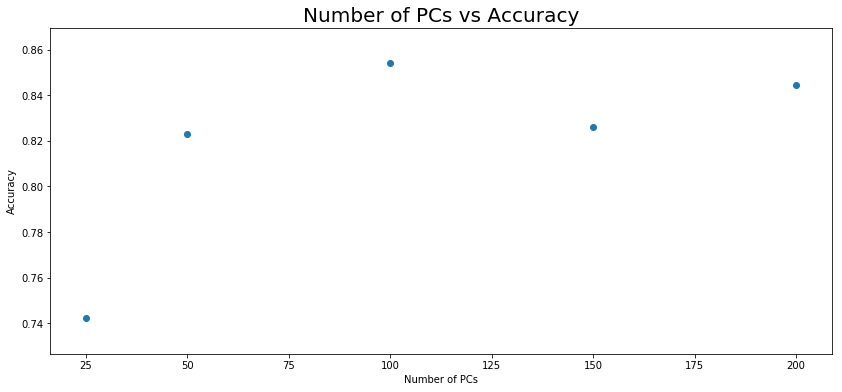

In [58]:
plt.figure(figsize = [14,6]);
plt.scatter(y = [acc_25, acc_50, acc_100, acc_150, acc_200], x = [25,50,100,150,200]);
plt.xlabel('Number of PCs');
plt.ylabel('Accuracy');
plt.title('Number of PCs vs Accuracy', fontsize = 20);
plt.show();

#### Copying file

In [59]:
# Importing shutil to deal with copy
from shutil import copyfile

# File name
filename = 'eigenfaces.ipynb'

# Lesson
lesson = '13-Lesson_13'

# Directory to make a copy
dir_copy = '../../' + lesson + '/00-Mini Project/' + filename

# Copying file.
copyfile(filename, dir_copy)